<a href="https://www.kaggle.com/code/mounirelhady/dv-car-price-prediction?scriptVersionId=155417051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/mariambakr/car-price-prediction-challenge/car_price_prediction.csv
/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


# Import libraries 
**add libraries that we will use in our project**

In [2]:
# Adding the libraries
import numpy as np 
import openpyxl
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import os


# Import dataset 
**Import the CSV file (dataset) that we will work on it**

In [3]:
# importing the dataset 
car_df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


**To eliminate blank spaces ::**

In [4]:
import numpy as np 
car_df["Levy"]=car_df['Levy'].replace('-',0)
car_df["Levy"]=car_df["Levy"].astype('float64')
car_df.head(20)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394.0,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,0.0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


**-Import liberaries to do scaling and normalization :**


In [5]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

**-In this step we will do scalling .
-Scalling :: is changing of the range of data**

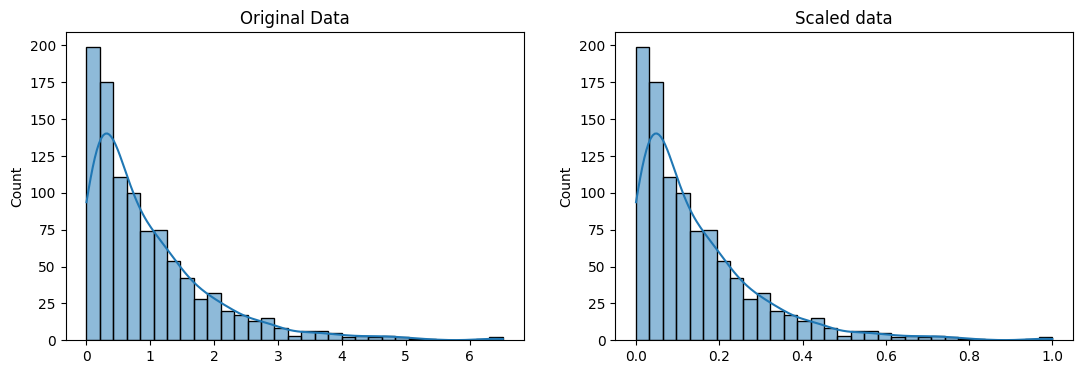

In [6]:
car_df= np.random.exponential(size=1000)
scaled_data = minmax_scaling(car_df, columns=[0])
fig, ax = plt.subplots(1,2, figsize=(13, 4))
sns.histplot(car_df, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

**-In this step we will do Normalization .
-Normimalization :: is changing the shape of distribution of data.**

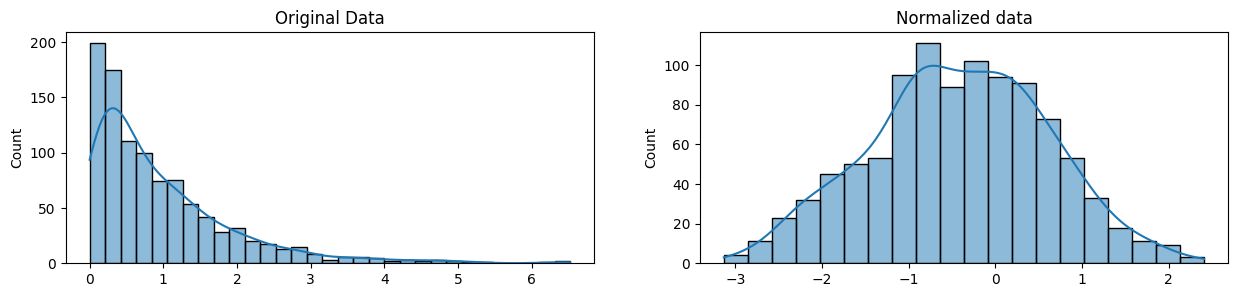

In [7]:
normalized_data = stats.boxcox(car_df)
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(car_df, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

**Line plot:t is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set**

In [8]:
car_df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
car_df.head(20)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


**_visualizing to manufacturer of cars by using line plot**


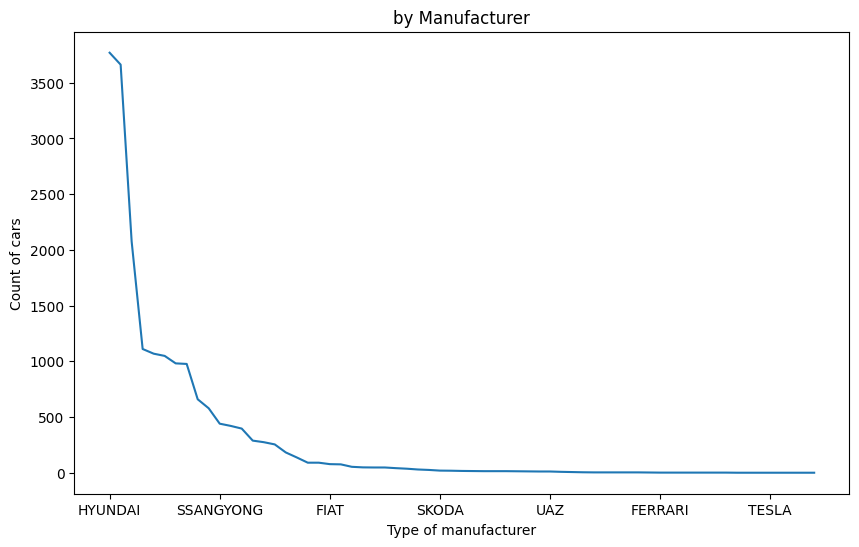

In [9]:
plt.figure(figsize=(10,6))
car_df['Manufacturer'].value_counts().plot(kind='line')
plt.title('by Manufacturer')
plt.xlabel('Type of manufacturer')
plt.ylabel('Count of cars')
plt.show()

**_visualizing to type of model of cars by using line plot**


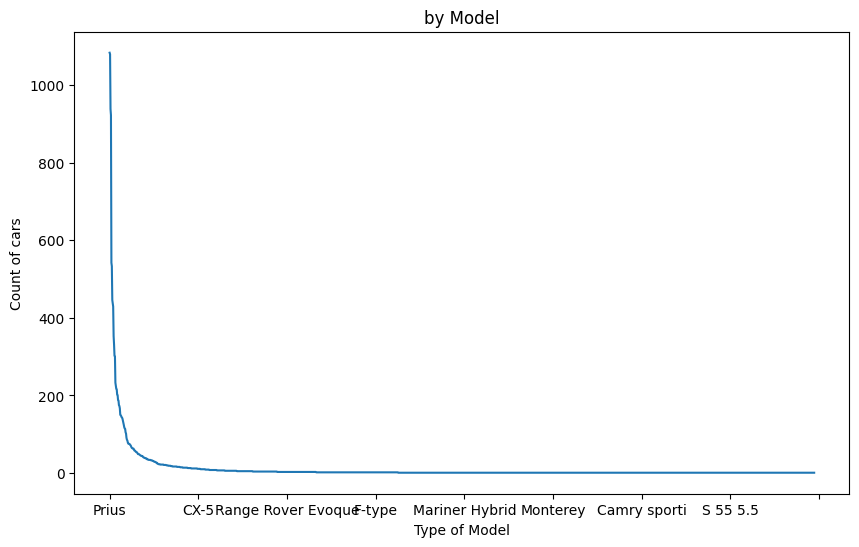

In [10]:
plt.figure(figsize=(10,6))
car_df['Model'].value_counts().plot(kind='line')
plt.title('by Model')
plt.xlabel('Type of Model')
plt.ylabel('Count of cars')
plt.show()


**_visualizing to type of category of cars by using line plot**

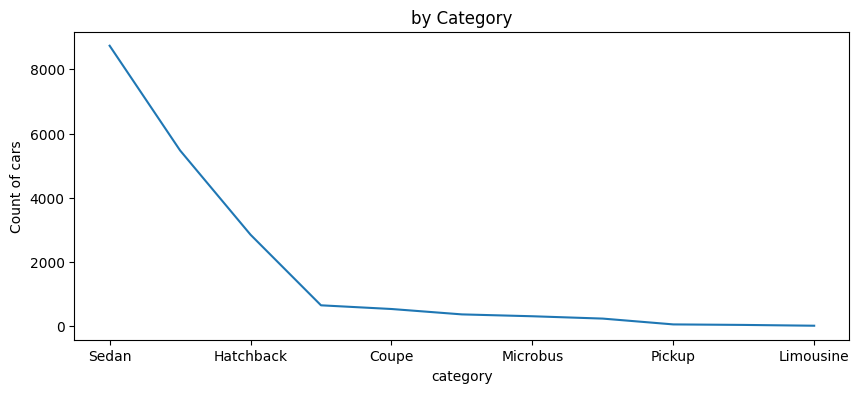

In [11]:
plt.figure(figsize=(10,4))
car_df['Category'].value_counts().plot(kind='line')
plt.title('by Category')
plt.xlabel('category')
plt.ylabel('Count of cars')
plt.show()

In [12]:
car_df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

**_visualizing to prod.year of cars by using line plot**

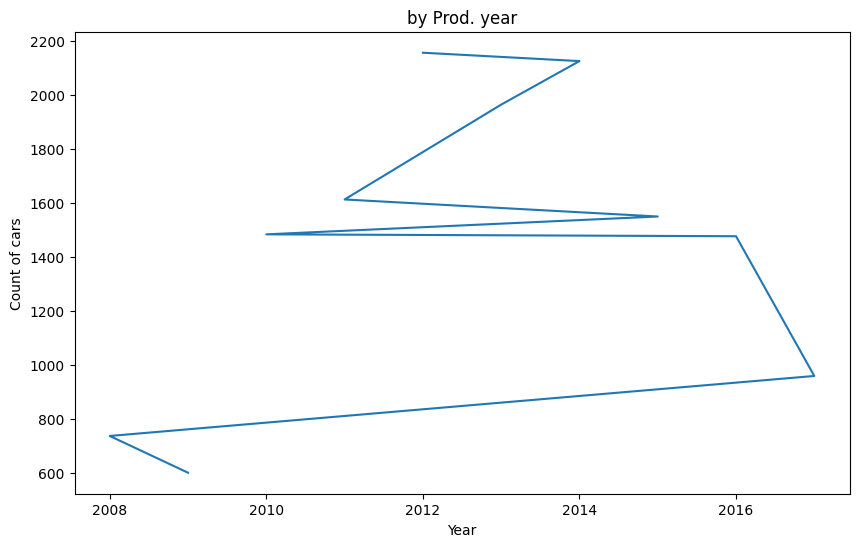

In [13]:
plt.figure(figsize=(10,6))
car_df['Prod. year'].value_counts()[:10].plot(kind='line')
plt.title('by Prod. year')
plt.xlabel('Year')
plt.ylabel('Count of cars')
plt.show()

**_visualizing to Type of Fuel of cars by using line plot**

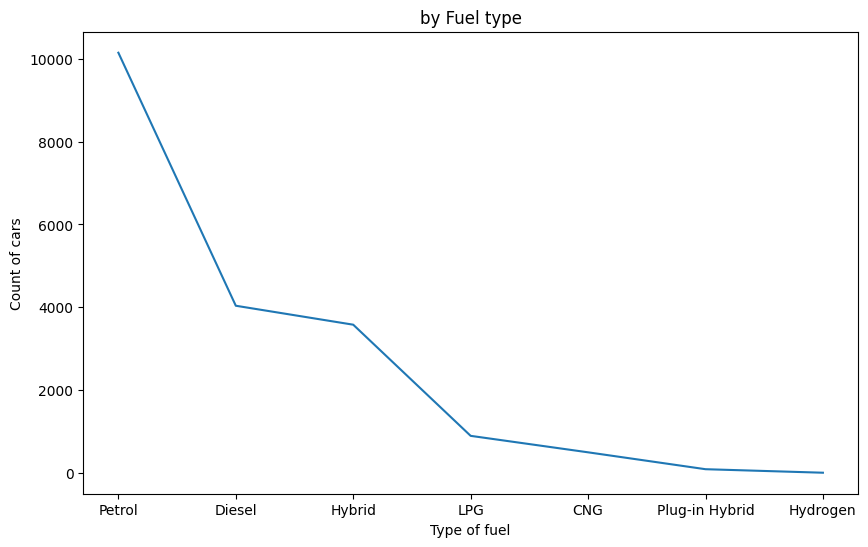

In [14]:
plt.figure(figsize=(10,6))
car_df['Fuel type'].value_counts()[:10].plot(kind='line')
plt.title('by Fuel type')
plt.xlabel('Type of fuel')
plt.ylabel('Count of cars')
plt.show()

**_visualizing to Engine volume of cars by using line plot**

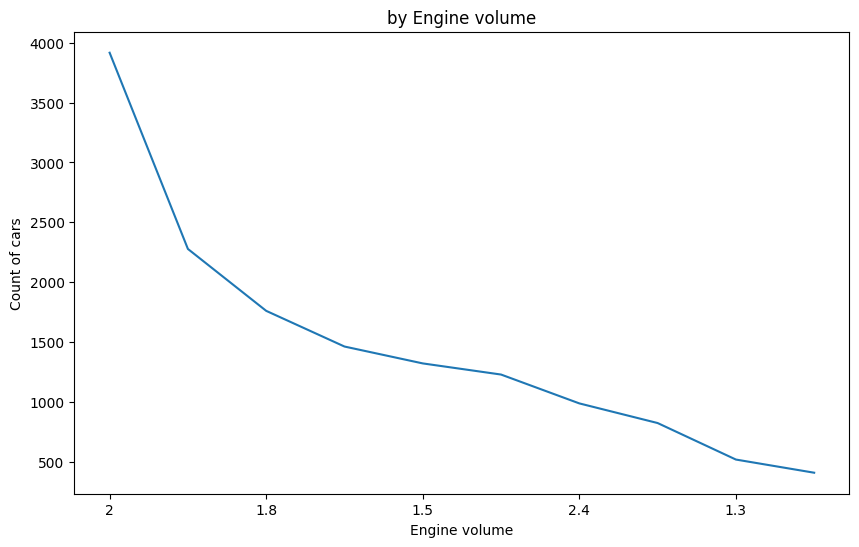

In [15]:
plt.figure(figsize=(10,6))
car_df['Engine volume'].value_counts()[:10].plot(kind='line')
plt.title('by Engine volume')
plt.xlabel('Engine volume')
plt.ylabel('Count of cars')
plt.show()

**_visualizing to Gear box type of cars by using line plot**

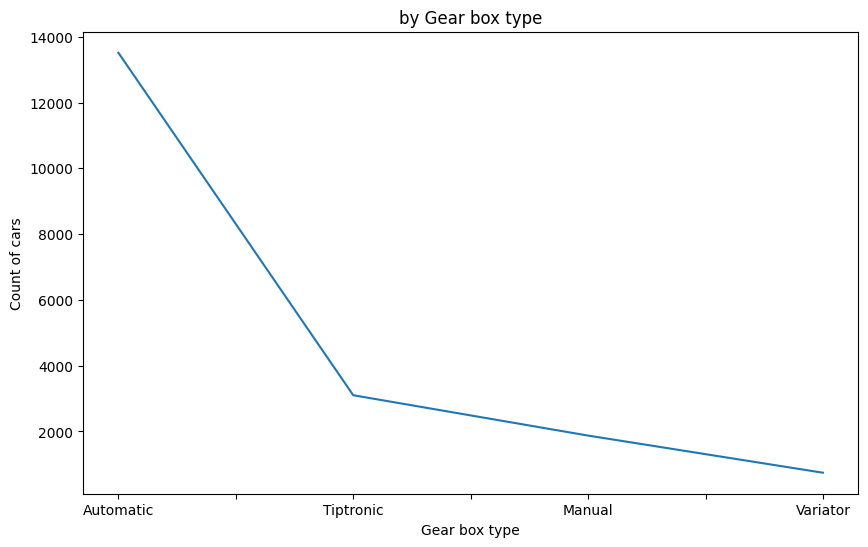

In [16]:
plt.figure(figsize=(10,6))
car_df['Gear box type'].value_counts()[:10].plot(kind='line')
plt.title('by Gear box type')
plt.xlabel('Gear box type')
plt.ylabel('Count of cars')
plt.show()

**_visualizing to Wheel of cars by using line plot**

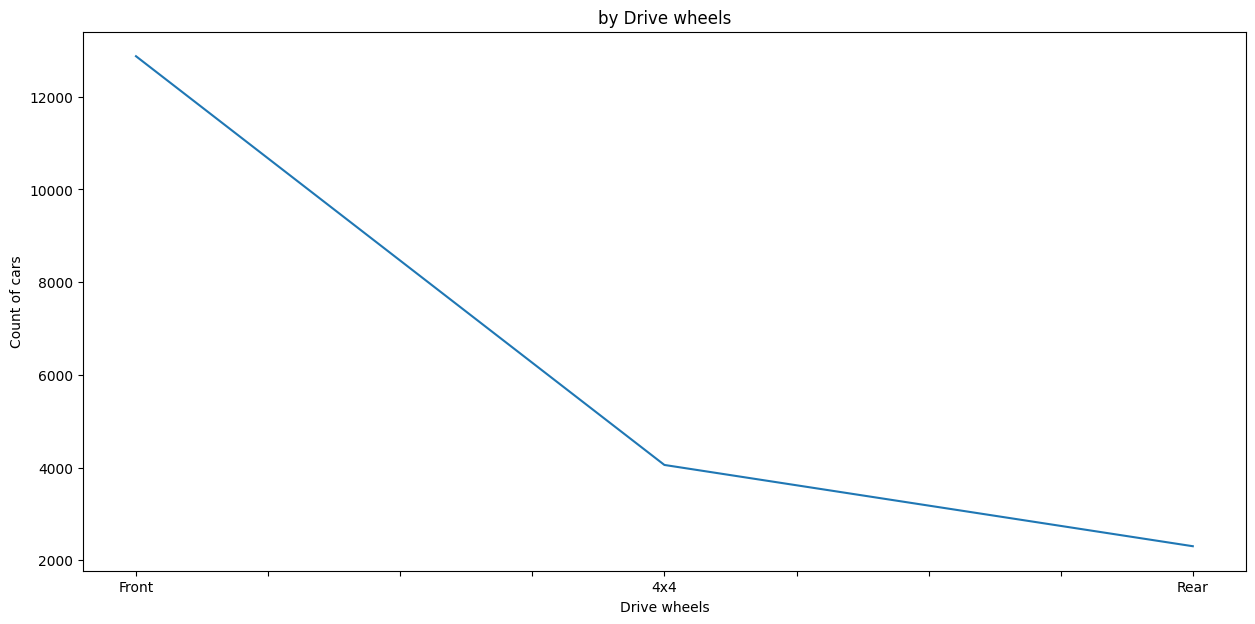

In [17]:
plt.figure(figsize=(15,7))
car_df['Drive wheels'].value_counts()[:20].plot(kind='line')
plt.title('by Drive wheels')
plt.xlabel('Drive wheels')
plt.ylabel('Count of cars')
plt.show()

**-Visualizing each item affecting on price******

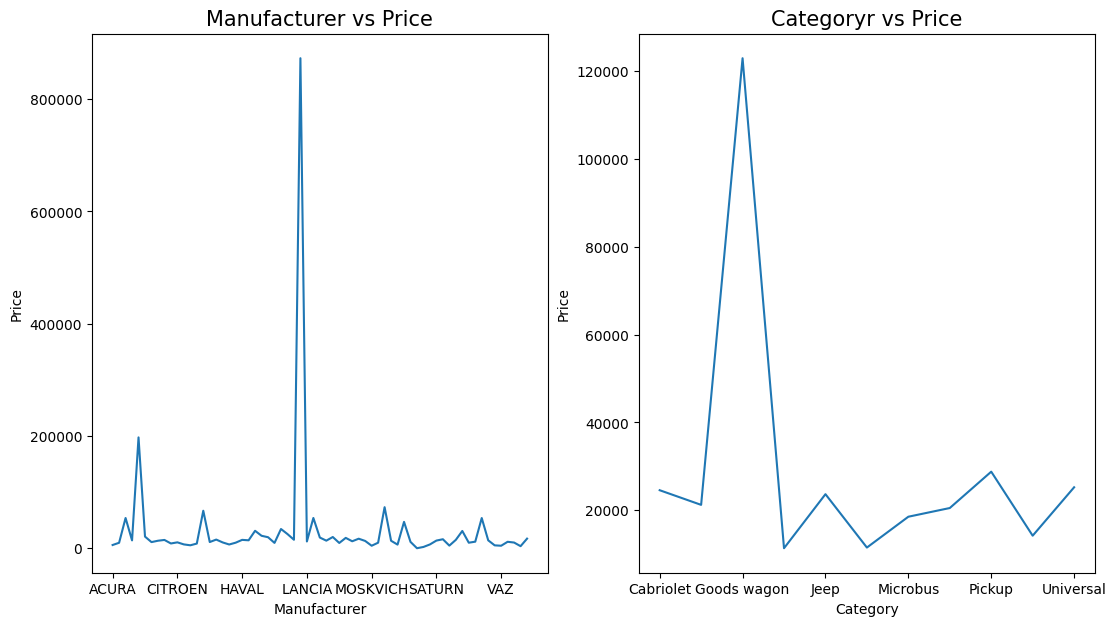

In [18]:
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.title('Manufacturer vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Manufacturer')['Price'].mean().plot.line()
plt.subplot(132)
plt.title('Categoryr vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Category')['Price'].mean().plot.line()
plt.show()

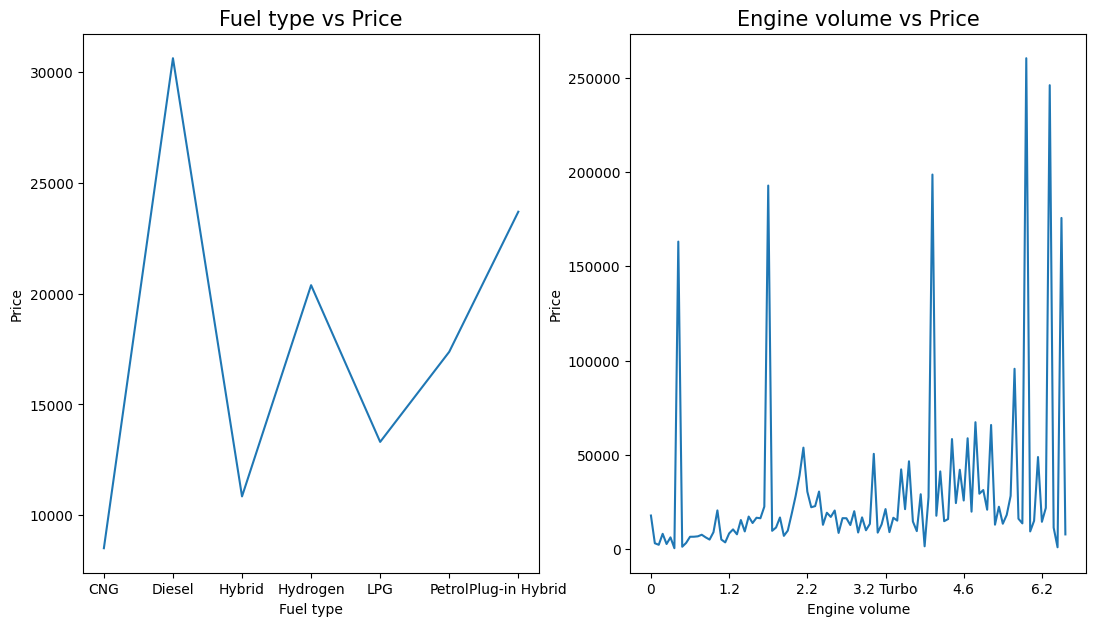

In [19]:
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.title('Fuel type vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Fuel type')['Price'].mean().plot.line()
plt.subplot(132)
plt.title('Engine volume vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Engine volume')['Price'].mean().plot.line()
plt.show()

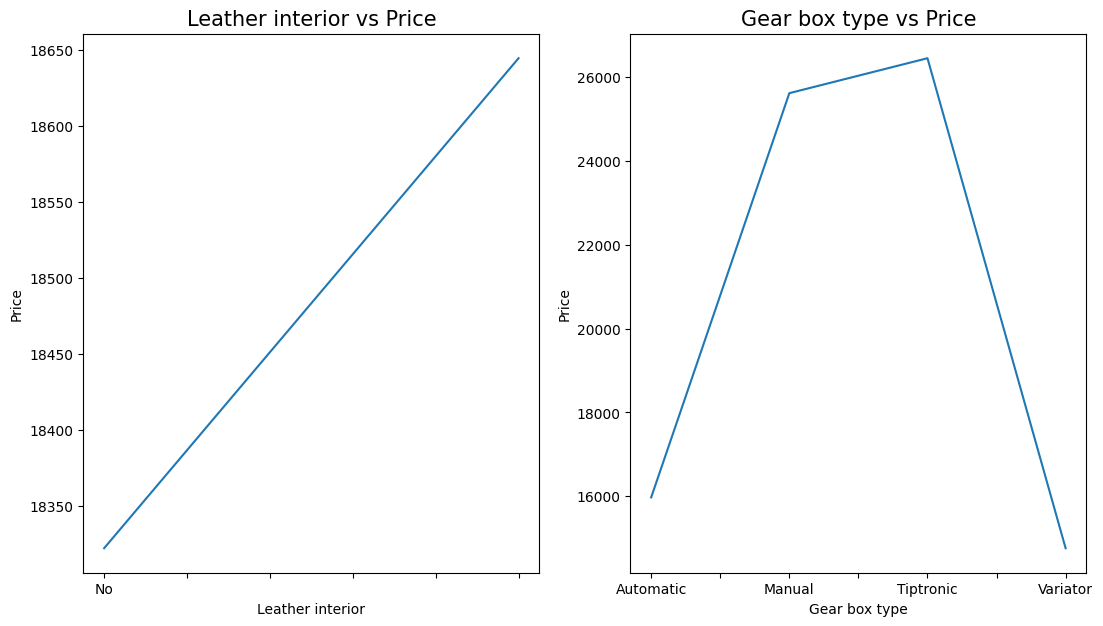

In [20]:
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.title('Leather interior vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Leather interior')['Price'].mean().plot.line()
plt.subplot(132)
plt.title('Gear box type vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Gear box type')['Price'].mean().plot.line()
plt.show()

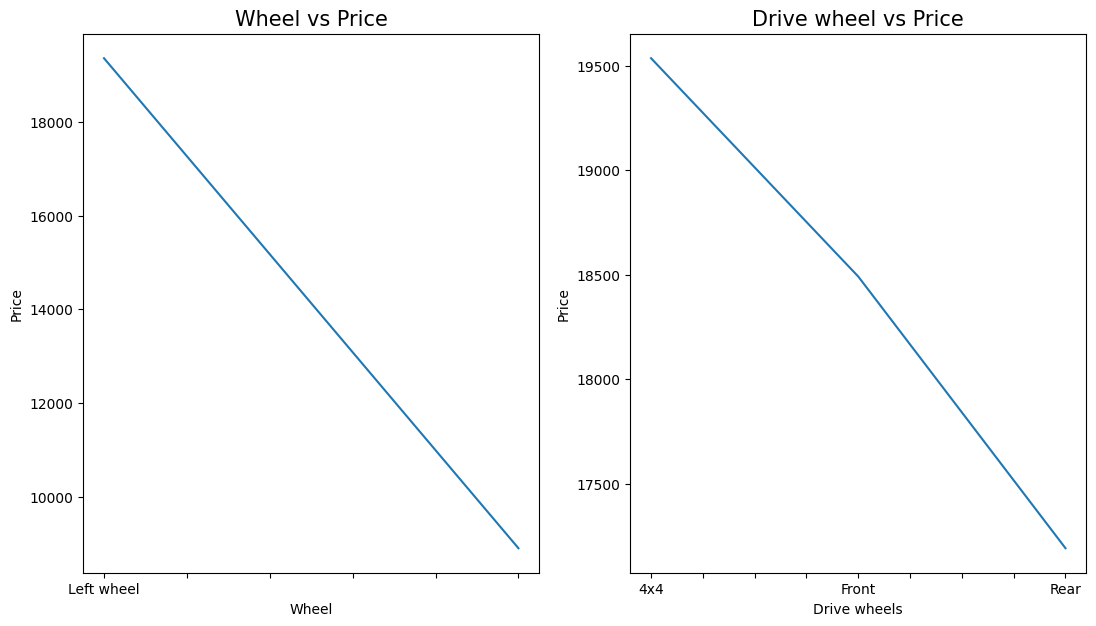

In [21]:
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.title('Wheel vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Wheel')['Price'].mean().plot.line()
plt.subplot(132)
plt.title('Drive wheel vs Price',fontsize = 15)
plt.ylabel("Price")
car_df.groupby('Drive wheels')['Price'].mean().plot.line()
plt.show()